In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv(r"C:\Users\manas\Downloads\Train_data.csv.zip")
test_df = pd.read_csv(r"C:\Users\manas\Downloads\Test_data.csv.zip")

In [6]:
train_df.head(5)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [7]:
train_df.shape

(25192, 42)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [13]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,25192.0,305.054104,2.686556e+03,0.0,0.00,0.00,0.00,42862.0
src_bytes,25192.0,24330.628215,2.410805e+06,0.0,0.00,44.00,279.00,381709090.0
dst_bytes,25192.0,3491.847174,8.883072e+04,0.0,0.00,0.00,530.25,5151385.0
land,25192.0,0.000079,8.909946e-03,0.0,0.00,0.00,0.00,1.0
wrong_fragment,25192.0,0.023738,2.602208e-01,0.0,0.00,0.00,0.00,3.0
urgent,25192.0,0.000040,6.300408e-03,0.0,0.00,0.00,0.00,1.0
hot,25192.0,0.198039,2.154202e+00,0.0,0.00,0.00,0.00,77.0
num_failed_logins,25192.0,0.001191,4.541818e-02,0.0,0.00,0.00,0.00,4.0
logged_in,25192.0,0.394768,4.888105e-01,0.0,0.00,0.00,1.00,1.0
num_compromised,25192.0,0.227850,1.041735e+01,0.0,0.00,0.00,0.00,884.0


In [14]:
def data_profiling(df):
    return pd.DataFrame({
        'column': df.columns,
        'dtype': df.dtypes.values,
        'nunique': df.nunique().values,
        'null': df.isnull().sum().values,
        'duplicates': df.apply(lambda col: col.duplicated().sum()).values
    })


In [16]:
data_profiling(train_df)

,column,dtype,nunique,null,duplicates
0,duration,int64,758,0,24434
1,protocol_type,object,3,0,25189
2,service,object,66,0,25126
3,flag,object,11,0,25181
4,src_bytes,int64,1665,0,23527
5,dst_bytes,int64,3922,0,21270
6,land,int64,2,0,25190
7,wrong_fragment,int64,3,0,25189
8,urgent,int64,2,0,25190
9,hot,int64,22,0,25170


In [17]:
train_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [20]:
for i in train_df.columns:
    print(train_df[i].nunique)

<bound method IndexOpsMixin.nunique of 0        0
1        0
2        0
3        0
4        0
        ..
25187    0
25188    0
25189    0
25190    0
25191    0
Name: duration, Length: 25192, dtype: int64>
<bound method IndexOpsMixin.nunique of 0        tcp
1        udp
2        tcp
3        tcp
4        tcp
        ... 
25187    tcp
25188    tcp
25189    tcp
25190    tcp
25191    tcp
Name: protocol_type, Length: 25192, dtype: object>
<bound method IndexOpsMixin.nunique of 0        ftp_data
1           other
2         private
3            http
4            http
           ...   
25187        exec
25188    ftp_data
25189     private
25190        nnsp
25191      finger
Name: service, Length: 25192, dtype: object>
<bound method IndexOpsMixin.nunique of 0          SF
1          SF
2          S0
3          SF
4          SF
         ... 
25187    RSTO
25188      SF
25189     REJ
25190      S0
25191      S0
Name: flag, Length: 25192, dtype: object>
<bound method IndexOpsMixin.nunique of 0     

In [21]:
train_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

<Axes: xlabel='class', ylabel='count'>

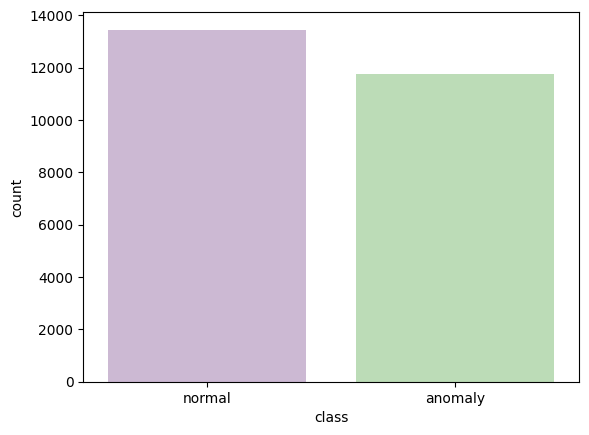

In [23]:
#EDA
sns.countplot(data=train_df,x='class',palette='PRGn')

<Axes: xlabel='protocol_type', ylabel='count'>

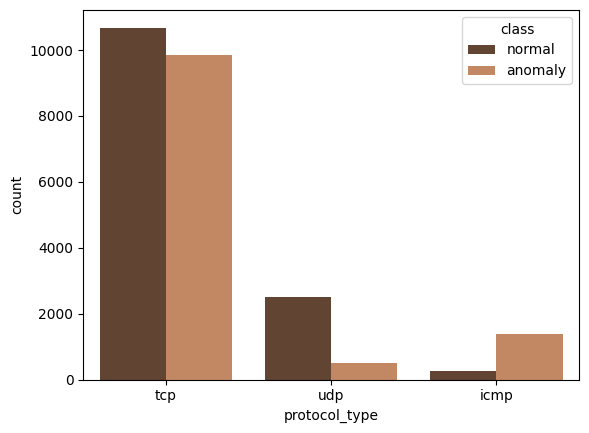

In [25]:
sns.countplot(data=train_df,x="protocol_type",hue='class',palette='copper')

<Axes: xlabel='flag', ylabel='count'>

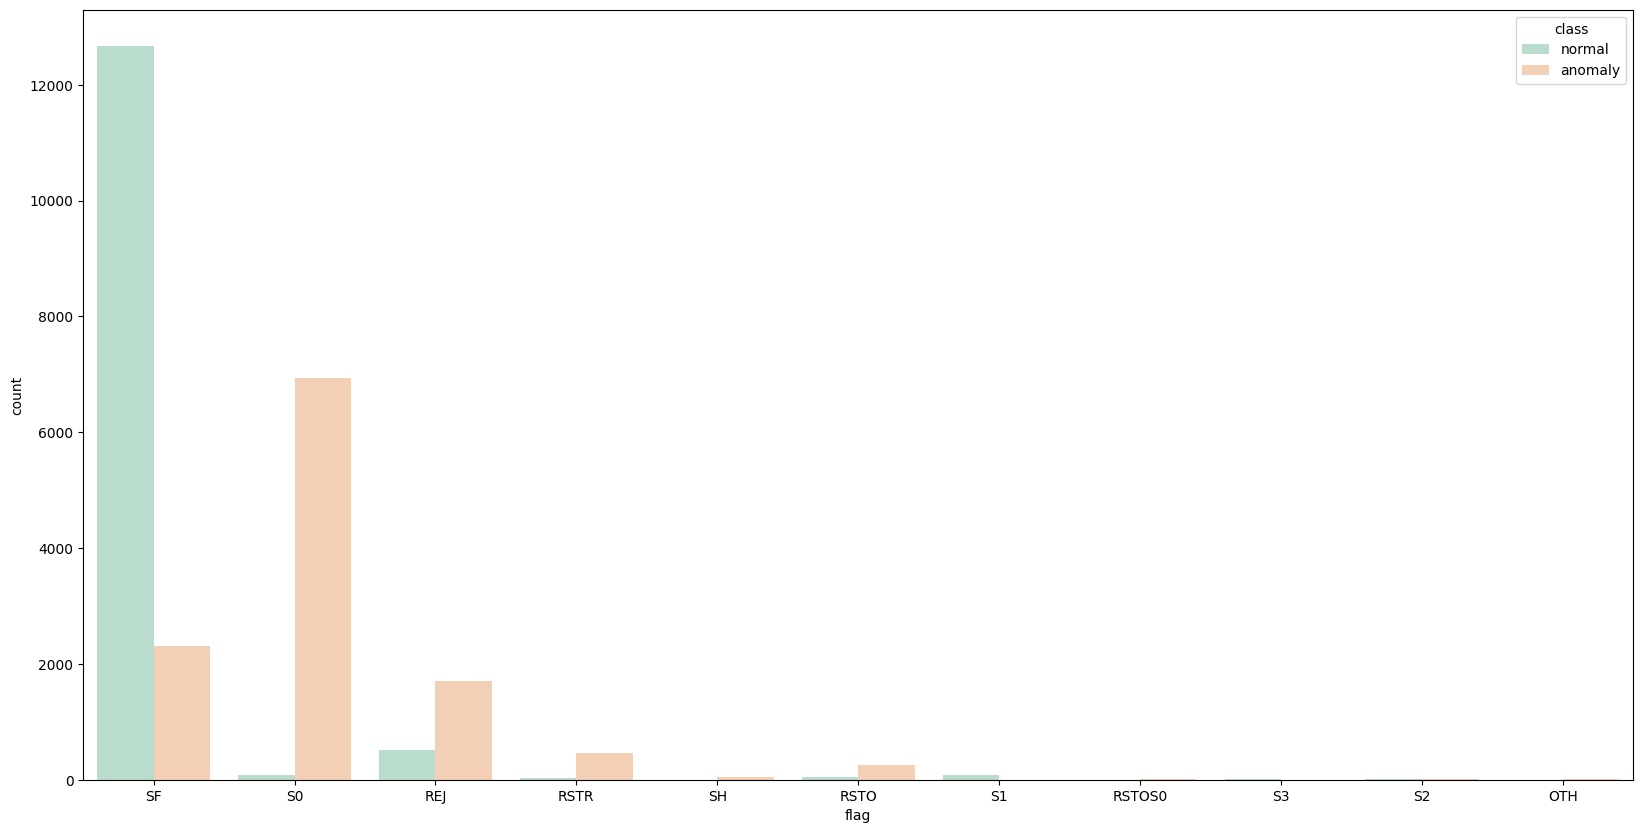

In [27]:
plt.figure(figsize=(20,10))
sns.countplot(data=train_df,x='flag',hue='class',palette='Pastel2')

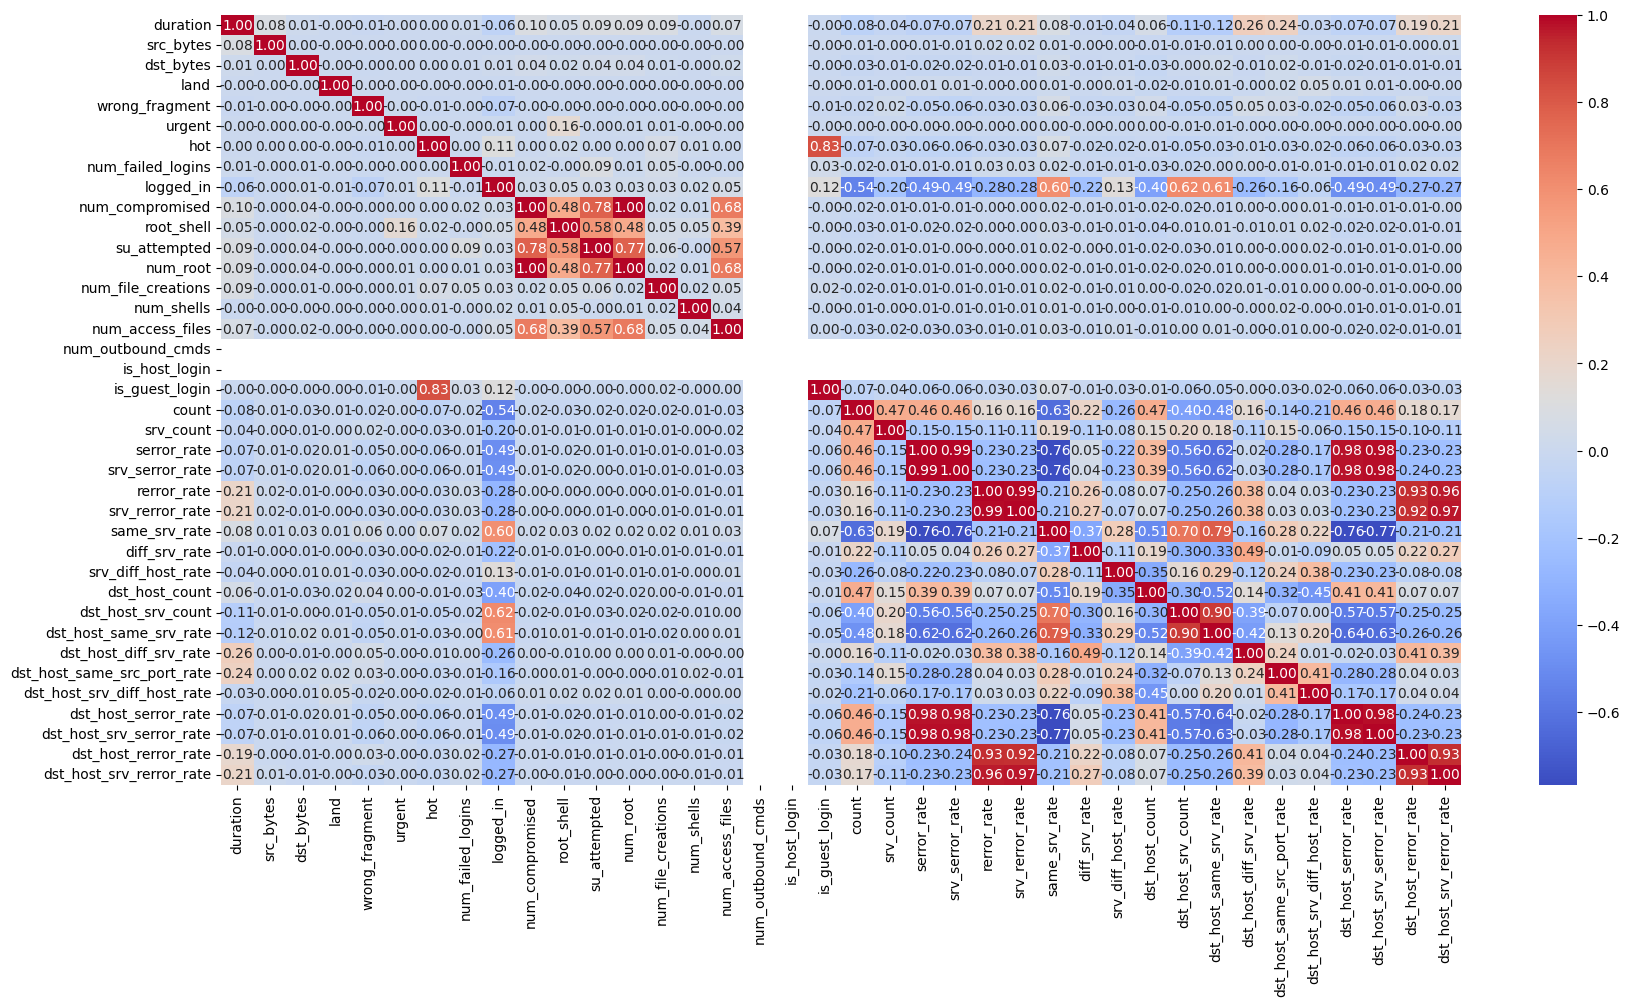

In [30]:
numeric_df = train_df.select_dtypes(include=['number'])  # Select only numeric columns
plt.figure(figsize=(20, 10))  # Adjusted for better visualization
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [33]:
#Encoding categorical variable

def encoding(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = preprocessing.LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

In [37]:
encoding(train_df)
train_df.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,0


In [42]:
#Feature selection
X = train_df.drop(['class'], axis=1)
y = train_df['class']
mutual = mutual_info_classif(X,y)
mutual

array([0.02474225, 0.04353129, 0.46651627, 0.3615227 , 0.56439418,
       0.43681318, 0.        , 0.00996903, 0.        , 0.01148805,
       0.        , 0.27977395, 0.007761  , 0.00558234, 0.00393912,
       0.00258215, 0.00154805, 0.00224129, 0.        , 0.        ,
       0.00952364, 0.        , 0.26434137, 0.076931  , 0.27446576,
       0.25976263, 0.04471074, 0.03525755, 0.35510474, 0.35533919,
       0.10413556, 0.13821112, 0.32852794, 0.30397414, 0.28731259,
       0.13411833, 0.1843366 , 0.28162558, 0.28008992, 0.04008497,
       0.0614948 ])

In [48]:
mutual = pd.Series(mutual)
mutual.index = X.columns
mutual.sort_values(ascending=False)

src_bytes                      0.564394
service                        0.466516
dst_bytes                      0.436813
flag                           0.361523
diff_srv_rate                  0.355339
same_srv_rate                  0.355105
dst_host_srv_count             0.328528
dst_host_same_srv_rate         0.303974
dst_host_diff_srv_rate         0.287313
dst_host_serror_rate           0.281626
dst_host_srv_serror_rate       0.280090
logged_in                      0.279774
serror_rate                    0.274466
count                          0.264341
srv_serror_rate                0.259763
dst_host_srv_diff_host_rate    0.184337
dst_host_count                 0.138211
dst_host_same_src_port_rate    0.134118
srv_diff_host_rate             0.104136
srv_count                      0.076931
dst_host_srv_rerror_rate       0.061495
rerror_rate                    0.044711
protocol_type                  0.043531
dst_host_rerror_rate           0.040085
srv_rerror_rate                0.035258


<Axes: >

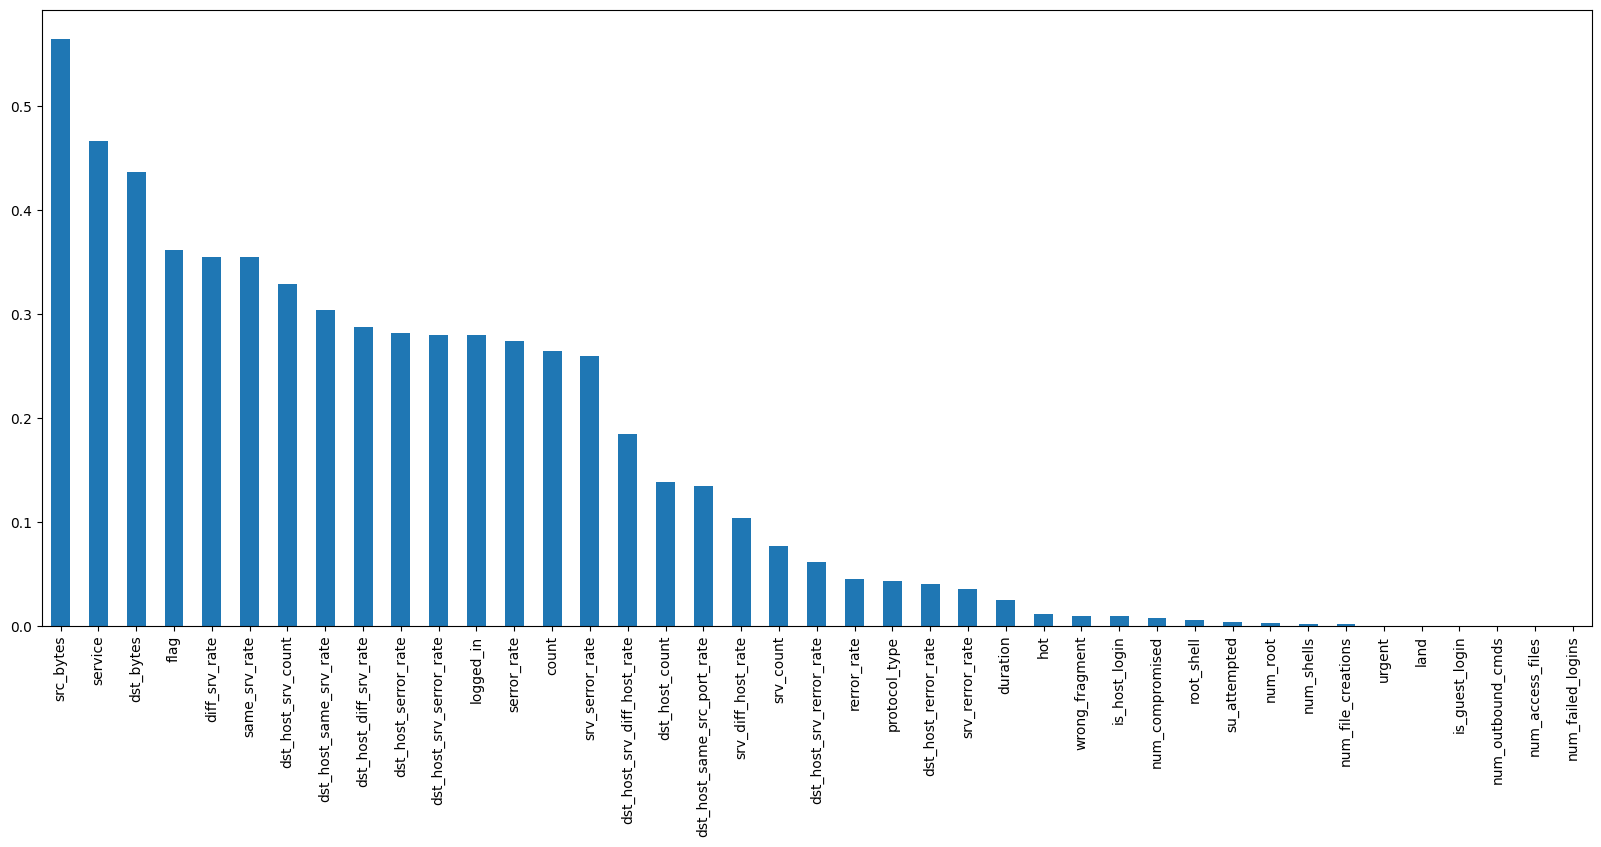

In [49]:
mutual.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [53]:
X = X[X.columns[SelectKBest(mutual_info_classif, k=25).fit(X, y).get_support()]]

In [56]:
#Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [60]:
#Model building
!pip install xgboost

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix

In [61]:
def evaluate_classifiers(x_train, x_test, y_train, y_test):
    classifiers = {
        'GaussianNB': GaussianNB(),
        'BernoulliNB': BernoulliNB(),
        'KNeighbors': KNeighborsClassifier(),
        'LogisticRegression': LogisticRegression(),
        'DecisionTree': DecisionTreeClassifier(),
        'RandomForest': RandomForestClassifier(),
        'GradientBoosting': GradientBoostingClassifier(),
        'XGBoost': XGBClassifier(),
        'Bagging': BaggingClassifier(),
        'AdaBoost': AdaBoostClassifier()
    }
    
    results = []
    
    for name, model in classifiers.items():
        model.fit(x_train, y_train)
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)

        results.append({
            'Classifier': name,
            'Train_Accuracy': accuracy_score(y_train, y_train_pred),
            'Train_Precision': precision_score(y_train, y_train_pred, average='micro'),
            'Train_F1': f1_score(y_train, y_train_pred, average='micro'),
            'Train_Recall': recall_score(y_train, y_train_pred, average='micro'),
            'Test_Accuracy': accuracy_score(y_test, y_test_pred),
            'Test_Precision': precision_score(y_test, y_test_pred, average='micro'),
            'Test_F1': f1_score(y_test, y_test_pred, average='micro'),
            'Test_Recall': recall_score(y_test, y_test_pred, average='micro'),
            'Test_AUC': roc_auc_score(y_test, y_test_pred)
        })
    
    return pd.DataFrame(results).sort_values('Test_Accuracy', ascending=False)

In [65]:
evaluate_classifiers(X_train,X_test,y_train,y_test)

,Classifier,Train_Accuracy,Train_Precision,Train_F1,Train_Recall,Test_Accuracy,Test_Precision,Test_F1,Test_Recall,Test_AUC
5,RandomForest,1.000000,1.000000,1.000000,1.000000,0.998015,0.998015,0.998015,0.998015,0.997959
7,XGBoost,1.000000,1.000000,1.000000,1.000000,0.997354,0.997354,0.997354,0.997354,0.997322
8,Bagging,0.999660,0.999660,0.999660,0.999660,0.996692,0.996692,0.996692,0.996692,0.996722
6,GradientBoosting,0.996314,0.996314,0.996314,0.996314,0.996031,0.996031,0.996031,0.996031,0.995956
4,DecisionTree,1.000000,1.000000,1.000000,1.000000,0.994311,0.994311,0.994311,0.994311,0.994385
2,KNeighbors,0.991550,0.991550,0.991550,0.991550,0.986240,0.986240,0.986240,0.986240,0.986321
9,AdaBoost,0.975105,0.975105,0.975105,0.975105,0.976713,0.976713,0.976713,0.976713,0.976434
3,LogisticRegression,0.947601,0.947601,0.947601,0.947601,0.949061,0.949061,0.949061,0.949061,0.947860
1,BernoulliNB,0.886753,0.886753,0.886753,0.886753,0.897989,0.897989,0.897989,0.897989,0.893523
0,GaussianNB,0.880628,0.880628,0.880628,0.880628,0.894417,0.894417,0.894417,0.894417,0.892570


In [68]:
#Random forest classifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [69]:
rf_predict=rf.predict(X_test)

In [70]:
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3516
           1       1.00      1.00      1.00      4042

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558



In [72]:
print(confusion_matrix(y_test,rf_predict))

[[3507    9]
 [   6 4036]]
